In [94]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [132]:
from ImageProcessing import ImageProcessing
import numpy as np

In [133]:
ip = ImageProcessing()
image = ip.read_im('images/ocean.png')
#print(image.shape)
#print(5//2)
#ip.show_im(image)

(257, 257, 3)


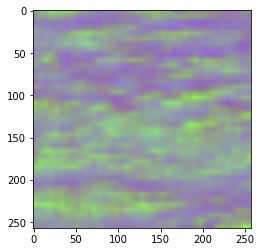

In [131]:
print(image.shape)
v = ip.patch_to_vector(image)
ip.show_im(ip.vector_to_patch(v))

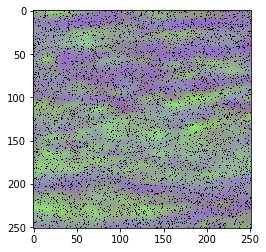

In [132]:
ip.show_im(ip.noise(ip.get_patch(126,126, 250, image), 0.1))

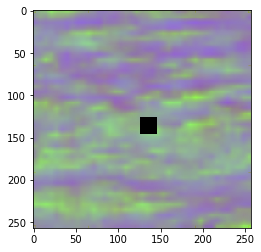

In [135]:
image2 = ip.delete_rect(image, 126,126,20,20)
ip.show_im(image2)

In [148]:
len(ip.get_incomplete_patches(image2, 250))

64

In [140]:
dictionary = ip.get_dictionary_patches(image, 64, 64)
#patch = ip.patch_to_vector(ip.get_patch(32,32, 64, image)).reshape(-1,1)
#b(patch, dictionnary, 1).shape
#dictionnary[np.nonzero([1,1,3])].shape
dictionary[:,1].shape

(12288,)

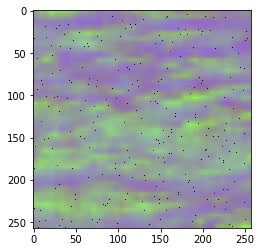

Now inpainted one!


/Users/samutamminen/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


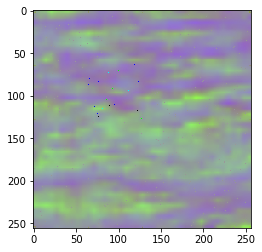

In [214]:
dictionary = ip.get_dictionary_patches(image, 64, 64)
#ip.show_im(image)
#ip.show_im(ip.reconstruct_image(dictionary, 64,64))
noise_image = ip.noise(image, 0.005)
ip.show_im(noise_image)

print("Now inpainted one!")
from IterativeInpainting import IterativeInpainting
h = 64
step = 64
alpha=0.5
iterations = 16 # parce que c'est le nombre des patches :D avec le strategie courant on peut iterer que une fois
inpainting = IterativeInpainting(noise_image, patch_sizes=h, step_size=step)
noise_dictionary = inpainting.inpaint(max_iter=iterations, alpha=alpha)
reconstructed_image = ip.reconstruct_image(noise_dictionary, h,step)
ip.show_im(reconstructed_image)

In [213]:
print("smaller than zero : " + str(np.count_nonzero(reconstructed_image < 0) / np.product(reconstructed_image.shape)))
print("bigger than one : " + str(np.count_nonzero(reconstructed_image > 1) / np.product(reconstructed_image.shape)))
reconstructed_image

smaller than zero : 0.0010121663411458333
bigger than one : 0.0


array([[[0.563786  , 0.6377952 , 0.49803922],
        [0.56367046, 0.63571435, 0.54901963],
        [0.5651042 , 0.6399999 , 0.39215687],
        ...,
        [0.5731707 , 0.60740745, 0.5294118 ],
        [0.5718954 , 0.6219513 , 0.32156864],
        [0.5711382 , 0.6212122 , 0.5176471 ]],

       [[0.5651341 , 0.6304348 , 0.5411765 ],
        [0.5642361 , 0.631579  , 0.59607846],
        [0.5652174 , 0.6330275 , 0.42745098],
        ...,
        [0.5738637 , 0.60273975, 0.57254905],
        [0.57272726, 0.6179775 , 0.34901962],
        [0.5719697 , 0.61538464, 0.56078434]],

       [[0.56609195, 0.63043475, 0.36078432],
        [0.5641026 , 0.63725483, 0.4       ],
        [0.5641026 , 0.6341464 , 0.32156864],
        ...,
        [0.5738637 , 0.59060407, 0.58431375],
        [0.5782313 , 0.60493827, 0.31764707],
        [0.57062143, 0.6082474 , 0.38039216]],

       ...,

       [[0.56666666, 0.5555555 , 0.5647059 ],
        [0.5662879 , 0.5534591 , 0.62352943],
        [0.5662879 , 0

In [208]:
p = np.array([1,1,1]).reshape(-1,1)
m = np.array([1,1,2]).reshape(-1,1)
np.max([p,m], axis=0)
np.ones(3).reshape(-1,1).shape
np.ones(3).reshape(-1,1).reshape(1,-1)

array([[1., 1., 1.]])